**Importing Required Libraries**

In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from numpy import array, asarray, zeros
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.layers.embeddings import Embedding
from keras.layers import LSTM, Flatten
from keras.layers.core import Dense

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Load the dataset**

In [2]:
df=pd.read_csv(r'dataset\train.csv')
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [3]:
df_test=pd.read_csv(r'dataset\test.csv')
df_test

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
...,...,...,...,...
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...
5198,25998,300 US Marines To Be Deployed To Russian Borde...,NaN,« Previous - Next » 300 US Marines To Be Deplo...


In [6]:
df=df.fillna(' ')
df['title']=df['author']+' '+df['title']

In [7]:
df

,id,title,author,text,label
0,0,Darrell Lucus Darrell Lucus House Dem Aide: We...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,Daniel J. Flynn Daniel J. Flynn FLYNN: Hillary...,Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Consortiumnews.com Consortiumnews.com Why the ...,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,Jessica Purkiss Jessica Purkiss 15 Civilians K...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Howard Portnoy Howard Portnoy Iranian woman ja...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Jerome Hudson Jerome Hudson Rapper T.I.: Trump...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,Benjamin Hoffman Benjamin Hoffman N.F.L. Playo...,Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Michael J. de la Merced and Rachel Abrams Mich...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"Alex Ansary Alex Ansary NATO, Russia To Hold P...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [8]:
df = df.drop(['text','id', 'author'], axis=1)
df.head()

,title,label
0,Darrell Lucus Darrell Lucus House Dem Aide: We...,1
1,Daniel J. Flynn Daniel J. Flynn FLYNN: Hillary...,0
2,Consortiumnews.com Consortiumnews.com Why the ...,1
3,Jessica Purkiss Jessica Purkiss 15 Civilians K...,1
4,Howard Portnoy Howard Portnoy Iranian woman ja...,1


In [9]:
df.columns.isna().any()

False

In [10]:
df.shape

(20800, 2)

<AxesSubplot:xlabel='label', ylabel='count'>

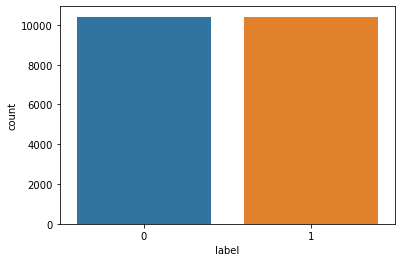

In [11]:
sns.countplot(x = 'label', data =df)

In [12]:
# check random sample values from dataset
df.sample(10)

,title,label
16677,Ashley Parker and Maggie Haberman Ashley Parke...,0
19499,hqanon hqanon 5 Things You Need to Know About ...,1
5174,Breitbart Jerusalem Breitbart Jerusalem Netany...,0
20274,EdJenner EdJenner VIDEO : Watters World Interv...,1
2833,Sean Adl-Tabatabai Sean Adl-Tabatabai DNC To S...,1
1336,Mannequin Challenge goes completely unnoti...,1
19269,"Richard Fausset, Frances Robles and John Eligo...",0
16419,Elizabeth Olson Elizabeth Olson More Law Degre...,0
14796,Warner Todd Huston Warner Todd Huston ’The Atl...,0
7055,Pakalert Pakalert World War 3 Warning and Amer...,1


**Data Preprocessing**

In [13]:
def clean_text(text):
    
    # convert to lowercase
    text = str(text).lower()  
    
    # remove single characters
    text = re.sub(pattern=r'\s+[a-zA-Z]\s+',repl='',string = text) 
    
    # Remove URls, whitespace characters  
    text = re.sub(r'https?://\S+|www\.\S+',repl='',string = text)  
    
    # Removes all the special characters, digits from 0-9 and Capital Letters  
    text = re.sub(r'[^a-z\s]',' ',string = text)
    
    # Substituting multiple spaces with single space
    text = re.sub(r'\s+', ' ', string = text)  
    
    # create stemming object
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text.split() if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

In [14]:
df['title'] = df['title'].apply(lambda x: clean_text(x))

In [15]:
df.head(15)

,title,label
0,darrel lucu darrel lucu hous dem aid even see ...,1
1,daniel j flynn daniel j flynn flynn hillari cl...,0
2,consortiumnew com consortiumnew com truth migh...,1
3,jessica purkiss jessica purkiss civilian kill ...,1
4,howard portnoy howard portnoy iranian woman ja...,1
5,daniel nussbaum daniel nussbaum jacki mason ho...,0
6,life life luxuri elton john favorit shark pict...,1
7,alissa j rubin alissa j rubin beno hamon win f...,0
8,excerpt fromdraft script donald trump q ampa w...,0
9,megan twohey scott shane megan twohey scott sh...,0


**From dataset limit the unique number of words from dataset**

In [17]:
max_no_words = 500000
max_sequence_length = 50

In [18]:
train_data = df.copy()

In [19]:
train_data.head()

,title,label
0,darrel lucu darrel lucu hous dem aid even see ...,1
1,daniel j flynn daniel j flynn flynn hillari cl...,0
2,consortiumnew com consortiumnew com truth migh...,1
3,jessica purkiss jessica purkiss civilian kill ...,1
4,howard portnoy howard portnoy iranian woman ja...,1


In [20]:
train_data.shape

(20800, 2)

In [21]:
# creating tokenizer object
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.title)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 19241


In [22]:
x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.title),
                        maxlen = max_sequence_length)

print("Training X Shape:",x_train.shape)

Training X Shape: (20800, 50)


In [23]:
x_train

array([[   0,    0,    0, ...,   67, 3828,  732],
       [   0,    0,    0, ...,  323, 1787,    5],
       [   0,    0,    0, ..., 1389,   64,  195],
       ...,
       [   0,    0,    0, ...,    1,    3,    2],
       [   0,    0,    0, ..., 5866, 3666, 6009],
       [   0,    0,    0, ...,  437,  139, 2073]])

In [24]:
train_data.label.unique().tolist()

[1, 0]

In [25]:
train_data.head()

,title,label
0,darrel lucu darrel lucu hous dem aid even see ...,1
1,daniel j flynn daniel j flynn flynn hillari cl...,0
2,consortiumnew com consortiumnew com truth migh...,1
3,jessica purkiss jessica purkiss civilian kill ...,1
4,howard portnoy howard portnoy iranian woman ja...,1


In [26]:
y_train = train_data['label']
y_train = y_train.values.reshape(-1,1)

print("y_train shape:", y_train.shape)

y_train shape: (20800, 1)


**Embedding Layer : Glove Embedding**

In [34]:
glv_emb = open(r'C:\Users\ASUS\Desktop\Fake News Detection\dataset\glove.6B.100d.txt', encoding='utf8')

In [35]:
LR = 1e-3
EMBEDDING_DIM = 100
BATCH_SIZE = 32
EPOCHS = 10

In [36]:
embeddings_index = {}

for line in glv_emb:
    values = line.split()
    word = value = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
        
glv_emb.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [37]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [38]:
import tensorflow as tf
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=max_sequence_length,
                                          trainable=False)

**Build the model   :  LSTM for text Classification**

In [39]:
model = Sequential()
model.add(embedding_layer)
model.add(LSTM(128))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

In [40]:
# compile the model
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['acc'])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           1924100   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2,041,477
Trainable params: 117,377
Non-trainable params: 1,924,100
_________________________________________________________________


In [42]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,validation_split=0.1, verbose=1)

Epoch 1/10
585/585 [==============================] - 9s 15ms/step - loss: 0.1382 - acc: 0.9466 - val_loss: 0.0771 - val_acc: 0.9784
Epoch 2/10
585/585 [==============================] - 9s 16ms/step - loss: 0.0465 - acc: 0.9850 - val_loss: 0.0480 - val_acc: 0.9875
Epoch 3/10
585/585 [==============================] - 10s 17ms/step - loss: 0.0262 - acc: 0.9921 - val_loss: 0.0380 - val_acc: 0.9904
Epoch 4/10
585/585 [==============================] - 11s 18ms/step - loss: 0.0182 - acc: 0.9947 - val_loss: 0.0395 - val_acc: 0.9889
Epoch 5/10
585/585 [==============================] - 11s 20ms/step - loss: 0.0130 - acc: 0.9963 - val_loss: 0.0300 - val_acc: 0.9923
Epoch 6/10
585/585 [==============================] - 12s 20ms/step - loss: 0.0097 - acc: 0.9974 - val_loss: 0.0355 - val_acc: 0.9913
Epoch 7/10
585/585 [==============================] - 12s 20ms/step - loss: 0.0071 - acc: 0.9982 - val_loss: 0.0294 - val_acc: 0.9923
Epoch 8/10
585/585 [==============================] - 12s 20ms/s

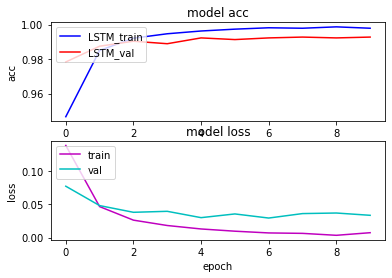

In [43]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['acc'], c= 'b')
at.plot(history.history['val_acc'], c='r')
at.set_title('model acc')
at.set_ylabel('acc')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [44]:
def predictions(text):
    text1 = tokenizer.texts_to_sequences(text)
    text_padded = pad_sequences(
        text1,
        padding = 'post',
        maxlen = max_sequence_length
    )
    pred = model.predict(text_padded)
    return 'Fake' if pred[0] >= 0.5 else 'Real'

**Predict on test dataset**

In [45]:
test_df=pd.read_csv(r'dataset\test.csv')
test_df.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [46]:
test_df['title']=test_df['author']+' '+test_df['title']

In [49]:
predictions([test_df.iloc[10].title])

'Fake'

In [53]:
predictions([test_df.iloc[400].title])

'Real'

In [54]:
test_df.iloc[400].title

'Peter Baker Trump’s Shift on Russia Brings Geopolitical Whiplash - The New York Times'

In [55]:
predictions([test_df.iloc[2530].title])

'Real'

In [56]:
print([test_df.iloc[2530].title])

['The New York Times Tips to Reduce Food Waste - The New York Times']
